In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
from keras.models import load_model

In [2]:
start='2001-01-01'
end='2020-01-01'
user_input=input("Stock Name:")
df = data.DataReader(user_input,'yahoo',start,end)
df.head()
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2975.000000,2975.000000,2975.000000,2975.000000,2.975000e+03,2975.000000
mean,227.838044,219.826259,224.044897,223.715536,2.892930e+06,215.924655
std,108.889224,106.710059,108.027073,107.883875,3.051564e+06,107.171310
min,52.509998,50.730000,51.400002,51.590000,0.000000e+00,47.914730
25%,137.399994,131.224998,134.974998,134.699997,1.229062e+06,127.339039
50%,174.699997,166.000000,170.000000,170.100006,2.194030e+06,160.389343
75%,331.649994,320.549988,326.100006,325.650009,3.573876e+06,316.826416
max,452.350006,434.799988,450.000000,448.750000,6.260449e+07,438.315674


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-26,370.600006,362.100006,368.799988,363.649994,2503435.0,357.172729
2019-12-27,367.899994,362.799988,366.750000,363.700012,2146972.0,357.221863
2019-12-30,371.000000,363.750000,371.000000,365.950012,4732203.0,359.431763
2019-12-31,368.649994,364.899994,366.000000,366.000000,2043206.0,359.480896
2020-01-01,379.250000,366.000000,368.000000,377.649994,11377167.0,370.923370


In [4]:
df=df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2007-11-27,207.000000,154.000000,154.000000,191.800003,27262365.0,177.675125
1,2007-11-28,197.800003,174.929993,194.000000,177.000000,21958915.0,163.965057
2,2007-11-29,182.800003,168.460007,181.000000,177.399994,25616715.0,164.335587
3,2007-11-30,191.399994,178.000000,178.000000,185.800003,23047035.0,172.116974
4,2007-12-03,198.860001,184.399994,187.949997,196.000000,14578850.0,181.565811


In [5]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,High,Low,Open,Close,Volume
0,207.000000,154.000000,154.000000,191.800003,27262365.0
1,197.800003,174.929993,194.000000,177.000000,21958915.0
2,182.800003,168.460007,181.000000,177.399994,25616715.0
3,191.399994,178.000000,178.000000,185.800003,23047035.0
4,198.860001,184.399994,187.949997,196.000000,14578850.0


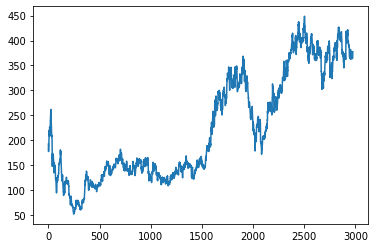

In [6]:
plt.plot(df.Close)

In [7]:
ma100=df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2970    379.638502
2971    379.537002
2972    379.462002
2973    379.346502
2974    379.412002
Name: Close, Length: 2975, dtype: float64

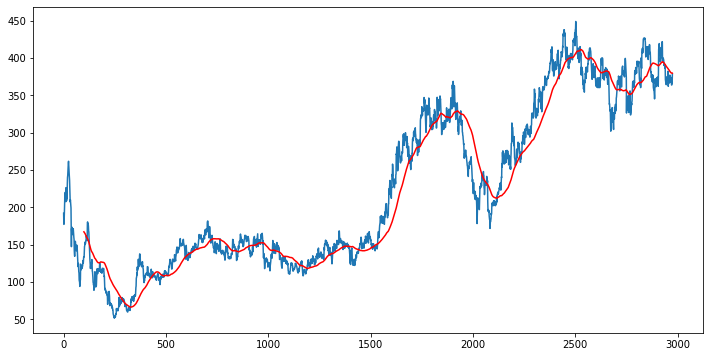

In [8]:
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [9]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2970    384.76400
2971    384.95625
2972    385.15675
2973    385.32075
2974    385.51275
Name: Close, Length: 2975, dtype: float64

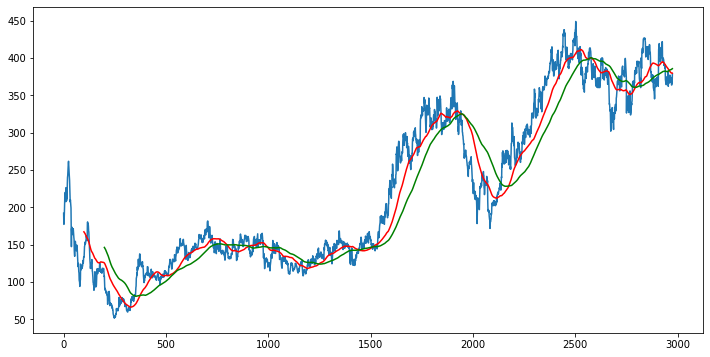

In [10]:
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [11]:
df.shape

(2975, 5)

In [12]:
# Splitting the data set into training and testing data
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2082, 1)
(893, 1)


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [14]:
data_training_array= scaler.fit_transform(data_training)
data_training_array

array([[0.44235868],
       [0.39566508],
       [0.39692705],
       ...,
       [0.43210502],
       [0.42342885],
       [0.41538366]])

In [15]:
x_train=[]
y_train=[]
for  i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])
x_train, y_train=np.array(x_train),np.array(y_train)

In [16]:
from keras.layers import Dense ,Dropout ,LSTM
from keras.models import Sequential


In [17]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [19]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
62/62 [==============================] - 21s 207ms/step - loss: 0.0339
Epoch 2/50
62/62 [==============================] - 13s 203ms/step - loss: 0.0082
Epoch 3/50
62/62 [==============================] - 12s 201ms/step - loss: 0.0079
Epoch 4/50
62/62 [==============================] - 12s 201ms/step - loss: 0.0068
Epoch 5/50
62/62 [==============================] - 14s 225ms/step - loss: 0.0070
Epoch 6/50
62/62 [==============================] - 12s 200ms/step - loss: 0.0066
Epoch 7/50
62/62 [==============================] - 12s 201ms/step - loss: 0.0054
Epoch 8/50
62/62 [==============================] - 13s 202ms/step - loss: 0.0062
Epoch 9/50
62/62 [==============================] - 12s 201ms/step - loss: 0.0049
Epoch 10/50
62/62 [==============================] - 13s 205ms/step - loss: 0.0050
Epoch 11/50
62/62 [==============================] - 12s 200ms/step - loss: 0.0050
Epoch 12/50
62/62 [==============================] - 12s 200ms/step - loss: 0.0048
Epoch 13/50
6

In [20]:
model.save('keras_model.h5')

In [21]:
data_testing.head()

,Close
2082,183.199997
2083,171.550003
2084,177.949997
2085,181.100006
2086,180.850006


In [22]:
data_training.tail()

,Close
2077,193.000000
2078,195.149994
2079,188.550003
2080,185.800003
2081,183.250000


In [23]:
past_100_days=data_training.tail(100)

In [24]:
final_df=past_100_days.append(data_testing,ignore_index=True)

C:\Users\TASHMOY GHOSH\AppData\Local\Temp\ipykernel_19336\3595571042.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing,ignore_index=True)


In [25]:
final_df.head()

,Close
0,260.200012
1,260.600006
2,257.600006
3,257.299988
4,258.100006


In [26]:
input_data=scaler.fit_transform(final_df)
input_data[:10]

array([[0.31980523],
       [0.32124821],
       [0.3104257 ],
       [0.30934338],
       [0.31222945],
       [0.32629869],
       [0.33189028],
       [0.32539682],
       [0.32233042],
       [0.3463203 ]])

In [27]:
input_data.shape

(993, 1)

In [28]:
x_test=[]
y_test=[]
for  i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])
x_test, y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)


(893, 100, 1)
(893,)


In [29]:
y_predicted=model.predict(x_test)
y_predicted.shape

(893, 1)

In [30]:
y_test.shape

(893,)

In [31]:
y_predicted.shape

(893, 1)

In [32]:
scalar=scaler.scale_
scalar

array([0.0036075])

In [33]:
scale_factor=1/(scalar[0])
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

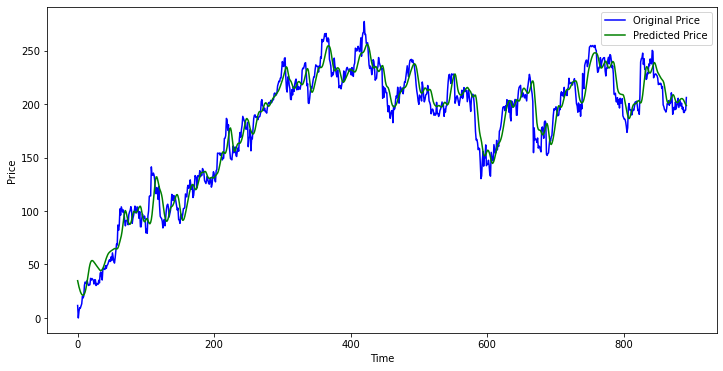

In [34]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'g',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()